# Artificial Neural Networks

ToDo: general explanation of neuroscientific aspects of neural networks and a draft explaining synapses, neurons, layers and activation functions.

## Content

ToDo: Hyperlinks to respective cells

* Introduction
* Theoretical aspects of neural networks
* Activation functions
* Loss functions
* Optimizers
* Metrics
* Example: implementation in Keras

### How do they work?

Neurons learn to pay attention to specific parts of the input space. For example, the relationship between $X_1,X_7$ and $X_9$. This, along with the activation functions, allow neural networks to learn nonlinear functions that model the process.

### How do they learn? Backpropagation

The errors are propagated back to the weights, usually through gradient descent.

$$\Delta W = W - \eta\frac{\partial L}{\partial W}$$

<img src='resources/gd.png'>

The training algorithm works in the following way:

1. Randomly initialize weights to small numbers close to 0.
2. Input the first observation of the dataset in the input layer, each feature in one input node.
3. Forward-propagation: from left to right, the neurons are activated until getting the predicted result $y$.
4. Compare the predicted result to the actual result. Measure the generated error.
5. Back-propagation: from right to left, the error is propagated. Update the weights according to how much they are responsible for the error and the learning rate.
6. Repeat steps 2 to 5 and update the weights after each observation (Stochastic learning) or repeat steps 2 to 5 only after a batch of observations (Batch learning).
7. When the whole training set passed through the ANN, that makes an epoch. Redo more epochs.

### References

* https://www.udemy.com/deeplearning/learn/v4/overview
* http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf
* https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications

# Efficient Neural Network Learning

*Based on Yann LeCun's paper [Efficient Backpropagation](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)*

## Learning Mechanisms

### Batch Gradient Descent

The weight update is given by the true average gradient, found by calculating the errors across all of the training samples.

* Conditions of **convergence** are **well understood**.
* Can be accelerated through techniques such as **conjugate gradient**
* Theoretical analysis of **weight dynamics** and convergence rates are simpler.

### Stochastic Gradient Descent

The weight update is given by an estimate of the true gradient, based on the error of each training sample. 

* It is usually **faster** than BGD, especially in large training sets. 
* Often results in **better minima** than BGD 
* Can be used to **track changes** in the system. 
* However, SGD is very noisy, which prevents it from reaching the global minima. To reduce this noise you could lower the training rate or have an adaptive batch size.

### Minibatch Gradient Descent

Is a mixture between BGD and SGD, in which learning starts with a small batch and increases its size as the training proceeds.

## Efficient Learning Heuristics

### Maximum Information Content 

"Networks learn the fastest from the most unexpected samples." 

* Shuffle the training set so that successive training examples rarely belong to the same class.
* Present input examples that produce a large error more frequently than examples that produce small errors.

Be careful when perturbing the natural frequency of data.

* If the example is an outlier, increasing the frequency of it can be disastrous.
* If the example is an infrequently ocurring input, for examples in unbalanced datasets, this could be beneficial.

### Input Normalization

"Convergence is faster if the inputs are normalized, scaled and uncorrelated."

* Normalize input variables such that the average of each variable across all training samples is close to zero. Substracting the means creates lower eigenvalues, which speeds up convergence.
* Apply principal components analysis (also known as Karhunen-Loeve expansion) to remove linear correlations in inputs. This decorrelation diagonalizes the Hessian of the weights matrices, making the learning rate per weight optimal.
* Scale input variables such that their covariances are all similar, unless it is known that some inputs are less significant than others, in which case they should be downscaled to be made less visible to the learning process. This also creates lower eigenvalues, which speeds up convergence.

<img src='resources/normalization.png'>

### Activation Functions

"Nonlinear activation functions are what give neural networks their nonlinear capabilities."

* Symmetric sigmoid about the origin (such as hyperbolic tangent) often converge faster than the standard logistic function.
* Sometimes it is helpful to add a small linear term, such as $f(x)=tanh(x)+ax$  in order to avoid flat spots.

Unlike sigmoids, radial basis functions cover a small local region of the input space.

* Can learn faster.
* May form a better set of basis functions to model the input space.
* In high-dimensional spaces, many RBF units are needed to cover the spaces.
* Use sigmoid functions in lower layers (higher dimensions).
* Use radial basis functions in higher layer (lower dimensions).
* Radial basis functions are usually trained by a combination of gradient descent (for output units) and unsupervised clustering (for determining the means and widths of the RBF units).

### Weight Initialization

"Weights should be chosen randomly, but in such a way that the sigmoid function is primarily activated in its linear region."

Assuming that the training set has been normalized and a symmetric sigmoid function has been used, the weights should be randomly drawn from a distribution with mean zero and standard deviation given by:

$$ \sigma_w = \frac{1}{\sqrt{m}} $$
 
Where $m$ is the number of connections feeding into the node.

### Learning Rates

"The main philosophy is to make sure that all the weights in the network converge roughly at the same speed."

* Give each weight its own learning rate.
* Learning rates should be proportional to the square root of the number of inputs to the unit.
* Learning rates in lower layers should typically be larger than in the higher layers.
* Momentum can increase the speed in highly nonspherical cost surfaces because it damps the size of the steps along directions of high curvature, thus yielding a larger effective rate along the directions of low curvature.

There exists an optimal learning rate $\eta_{opt}$, and is given by:

$$\eta_{opt} = H^{-1}$$

Where $H$ is the Hessian matrix:

$$H_{ij}=\frac{\partial^2E}{\partial W_i\partial W_j}$$

with $1 \geq i,j \geq N$ and $N$ equal to the total number of weights.

If the weights are coupled, $H$ must be rotated first such that it is diagonal (coordinate axes line up with the eigenvectors).

Let $\Theta$ be the rotation matrix such that

$$ \Lambda = \Theta H \Theta^T $$

where $\Lambda$ is diagonal and $\Theta^T\Theta = I$

The optimal learning rate for each weight (which is now independent of the others thanks to the diagonalization) is given by:

$$\eta_{opt, i} = \frac{1}{\lambda_i}$$

Convergence is proportional to the *condition number* $ k = \frac{\lambda_{max}}{\lambda_{min}} $

Therefore, it is desirable to have a small eigenvalue spread.

# Activation Functions

### Threshold function

Useful when the output $y$ is binary.

$$\phi(x)=\begin{cases} 
              1 & x\geq 0 \\
              0 & x<0 
   \end{cases}$$
   
### Sigmoid function   

Useful when the output $y$ is binary. Can be used for binary output layers.

$$\phi(x)=\frac{1}{1+e^{-x}}$$

### Rectifier linear unit

When is it useful?

$$\phi(x)=\text{max}(x,0)$$

### Hyperbolic Tangent Function

When is it useful?

$$\phi(x)=\text{tanh}(x)=\frac{1-e^{-2x}}{1+e^{-2x}}$$

### Softmax Function

Useful for multinomial output layers. Works as a sigmoid function for multiple dimensions.

$$\phi(x)=\frac{e^x}{\sum_je^x}$$

---

## Keras Activation Functions

https://keras.io/activations/

`from keras import activations`

ToDo: Web Scrape to keep list updated.

* softmax
* elu
* selu
* softplus
* softsign
* relu
* tanh
* sigmoid
* hard_sigmoid
* exponential
* linear

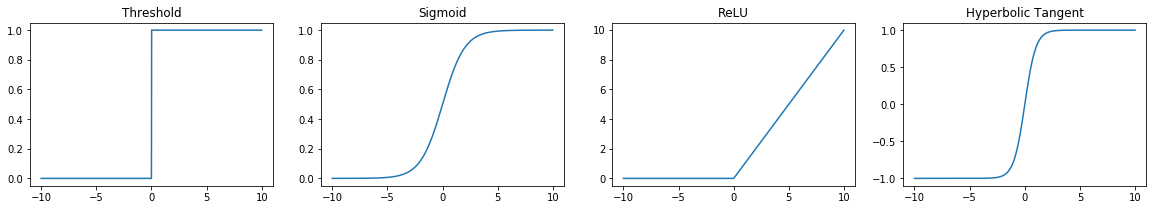

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#ToDo: Implement the new activation functions

x = np.arange(-10, 10, 0.01)

def threshold(x):
    return np.piecewise(x, [x >= 0, x < 0], [1, 0])

def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def elu(x):
    pass

def selu(x):
    pass

def softplus(x):
    pass

def softsign(x):
    pass

def hard_sigmoid(x):
    pass

def exponential(x):
    pass

def linear(x):
    pass

y_thresh = threshold(x)
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

f = plt.figure(figsize=(20,3))
ax1 = f.add_subplot(141, title='Threshold')
ax2 = f.add_subplot(142, title='Sigmoid')
ax3 = f.add_subplot(143, title='ReLU')
ax4 = f.add_subplot(144, title='Hyperbolic Tangent')

ax1.plot(x, y_thresh)
ax2.plot(x, y_sigmoid)
ax3.plot(x, y_relu)
ax4.plot(x, y_tanh)

plt.show()

# Loss Functions

### Quadratic loss

Also known as *mean squared error*, *maximum likelihood* and *sum squared error*.

$$L=\frac{1}{2}\sum_j(\hat{y}-y)^2$$

$$\nabla_{\hat{y}}L=(\hat{y}-y)$$

### Cross-entropy loss

Also known as *Bernoulli negative log-likelihood* and *binary cross-entropy*.

$$L=-\sum_j[y\ln(\hat{y})+(1-y)\ln(1-\hat{y})]$$

$$\nabla_{\hat{y}}L=\frac{\hat{y}-y}{\hat{y}(1-\hat{y})}$$

### Exponential loss

$\tau$ is a hyperparameter of the loss function.

$$L=\tau\exp(\frac{1}{\tau}\sum_j(\hat{y}-y)^2)$$

$$\nabla_{\hat{y}}L=\frac{2}{\tau}(\hat{y}-y)L$$

### Hellinger distance

Requires positive values for $\hat{y}$ and $y$, and ideally between $0$ and $1$.

$$L=\frac{1}{\sqrt{2}}\sum_j(\sqrt{\hat{y}}-\sqrt{y})^2$$

$$\nabla_{\hat{y}}L=\frac{\sqrt{\hat{y}}-\sqrt{y}}{\sqrt{2}\sqrt{\hat{y}}}$$

### Kullback-Leibler divergence loss

Also known as *information divergence*, *information gain*, *relative entropy*, *KLIC*, or *KL divergence*.

The Kullback-Leibler divergence is a measure of the information lost when $Q$ is used to approximate $P$ and is given by:

$$D_{KL}(P\parallel Q)=\sum_iP(i)\ln\frac{P(i)}{Q(i)}$$

The loss is given by setting $P=y$ and $Q=\hat{y}$

$$L=\sum_jy\ln\frac{y}{\hat{y}}$$

$$\nabla_{\hat{y}}L=-\frac{y}{\hat{y}}$$

### Generalized Kullback-Leibler divergence loss

$$L=\sum_jy\ln\frac{y}{\hat{y}}-\sum_jy+\sum_j\hat{y}$$

$$\nabla_{\hat{y}}L=\frac{\hat{y}-y}{\hat{y}}$$

### Itakura-Saito distance

$$L=\sum_j\big(\frac{y}{\hat{y}}-\log\frac{y}{\hat{y}}-1\big)$$

$$\nabla_{\hat{y}}L=\frac{\hat{y}-y}{(\hat{y})^2}$$

-------------

## Keras Loss Functions

https://keras.io/losses/

`from keras import losses`

ToDo: Web Scrape to keep list updated
ToDo: Plot function of each loss

* mean_squared_error
* mean_absolute_error
* mean_absolute_percentage_error
* mean_squared_logarithmic_error
* squared_hinge
* hinge
* categorical_hinge
* logcosh
* categorical_crossentropy
* sparse_categorical_crossentropy
* binary_crossentropy
* kullback_leibler_divergence
* poisson
* cosine_proximity

# Optimizers

## Keras Optimizers

https://keras.io/optimizers/

* sgd
* rmsprop
* adagrad
* adadelta
* adam
* adamax
* nadam

# Metrics

Metrics are used to report statistics on a certain set of measures. They are similar to loss functions, except that **the results from evaluating a metric are not used when training the model**.

https://keras.io/metrics/

## Keras Metrics

`from keras import metrics`

* binary_accuracy
* categorical_accuracy
* sparse_categorical_accuracy
* top_k_categorical_accuracy
* sparse_top_k_categorical_accuracy

# Preprocessing data

<img src='resources/skl.png'>

In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix

#import data
data = pd.read_csv('resources/Churn_Modelling.csv')
print('Initially, the data looks like this:')
print('------------------------------------')
print(data.head())
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

#categorical data encoding
encoder_1 = LabelEncoder()
X[:,1] = encoder_1.fit_transform(X[:,1])
encoder_2 = LabelEncoder()
X[:,2] = encoder_2.fit_transform(X[:,2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
print('\n\nAfter categorical data encoding (look that the first 3 columns are dummified):')
print('------------------------------------')
print(X[:5,:])

#removing first column to avoid dummy variable trap
X = X[:, 1:]

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#apply feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('\n\nFinally this is what the data looks like (notice that we omitted decorrelation with PCA for simplicity purposes):')
print('------------------------------------')
print(X_train[:5,:])

Initially, the data looks like this:
------------------------------------
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0

# Building a Neural Network with Keras and Tensorflow

<img src='resources/keras-tensorflow-logo.jpg'>

In [48]:
#import packages
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

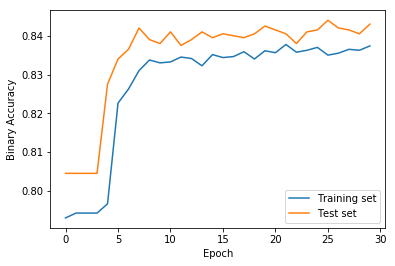

[[1554   55]
 [ 259  132]]


In [50]:
#create a simple neural network
classifier = Sequential() #initialize the ANN
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_shape=(11,))) #add first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu')) #add second hidden layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) #add output layer

#compile the neural network
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

#fit the ANN to the training set
history = classifier.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test), verbose=0)

#check accuracy through epochs
plt.plot(history.history['binary_accuracy'], label='Training set')
plt.plot(history.history['val_binary_accuracy'], label='Test set')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

#check the confusion matrix
y_pred = classifier.predict(X_test)
threshold = 0.5
y_pred = y_pred > threshold
print(confusion_matrix(y_test, y_pred))

In [ ]:
#evaluating and tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def build_classifier():
    classifier = Sequential() #initialize the ANN
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_shape=(11,)))
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu')) 
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
    return classifier

classifier = KerasClassifier(build_classifier, batch_size=32, epochs=5)
accuracies = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1)

ToDo:

* Create a framework to make hypothesis testing easier:

Hypotheses/Questions:

* Compare performance between different optimizers: BGD, SGD, MBGD
* Impact of shuffling data to generate maximum information content
* Impact of perturbing the natural frequency of the data
* Impact on convergence speed and loss when performing each step of input normalization
* Try different activation functions
* Try the suggested approaches for weight initialization
* Try the suggested tips for learning rates
* Try different loss functions